<a href="https://colab.research.google.com/github/Mostafa-Hamidifard/cvx-optimization/blob/main/cvx_hw7_q8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

preparation

In [5]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt
T = 30
length = T+1
T_start = 15
T_end = 20
S_min = 25
S_max = 35
L = 3.7

In [6]:
x = cvx.Variable((length,1))
y = cvx.Variable((length,1))
const =  []
const += [x[0] == 0 , y[0] == 0 ] ##
const += [x[1:] - x[:-1] >= 0] ##
diff_x = x[1:] - x[:-1]
diff_y = y[1:] - y[:-1]
const += [cvx.power(diff_x,2) + cvx.power(diff_y,2) <= S_max**2] ##

const += [y[:T_start+1] == 0] # y_t == 0 for t=0,1,2,...,T_start
const += [y[T_start:T_end] >= 0] # y_t >= 0 for t=T_start , ... , T_end-1
const += [y[T_end+1:] == L] # y_t==L for t=T_end+1 , ... , T

# const += [x[T_end+1:] - x[T_end:-1] >= S_min]
# const += [x[1:T_start] - x[:T_start-1] >= S_min]
const += [x[T_end+1:] - x[T_end:-1] >= S_min]
const += [x[1:T_start] - x[:T_start-1] >= S_min]
# extra condition
const += [x[1] == 26.637+0.4]

obj = 0
for t in range(1,T):
    obj += (x[t+1]-2*x[t]+x[t-1])**2 + (y[t+1]-2*y[t]+y[t-1])**2

problem = cvx.Problem(cvx.Minimize(obj),const)
problem.solve()

0.4889285714299684

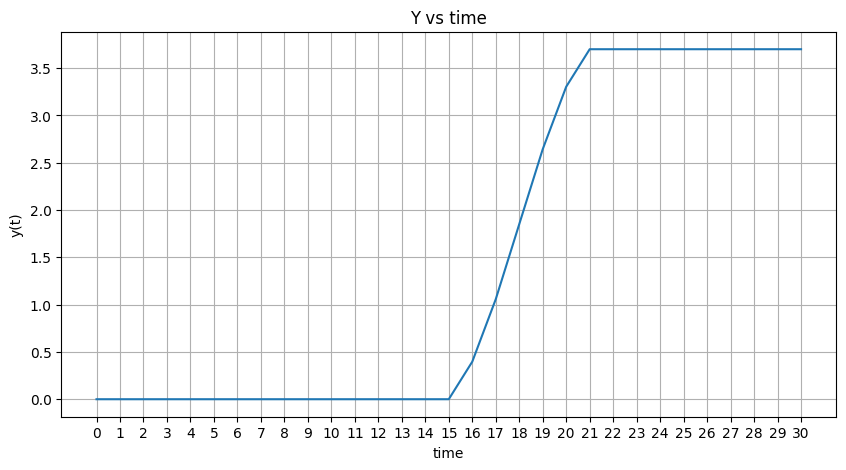

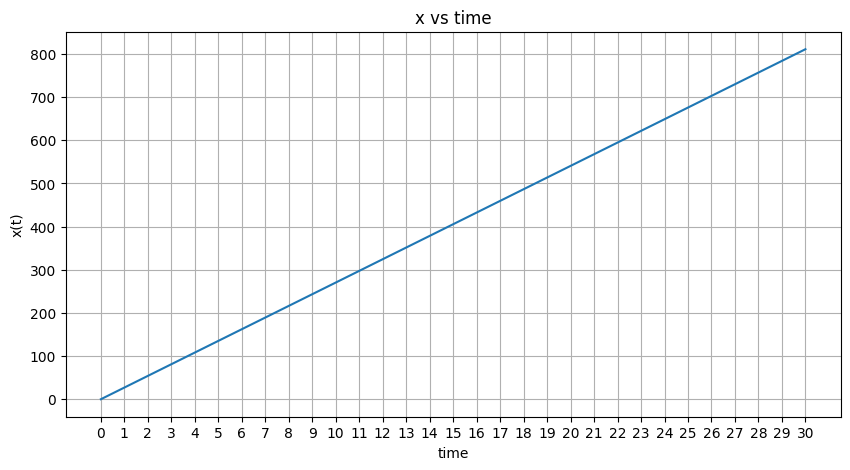

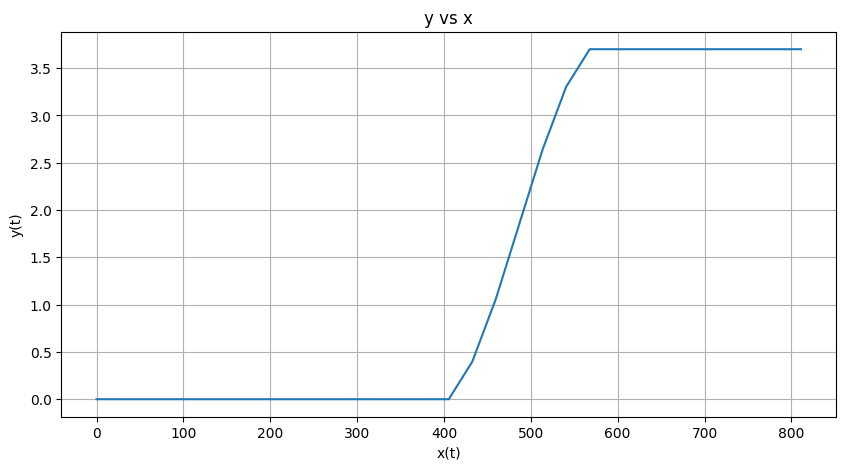

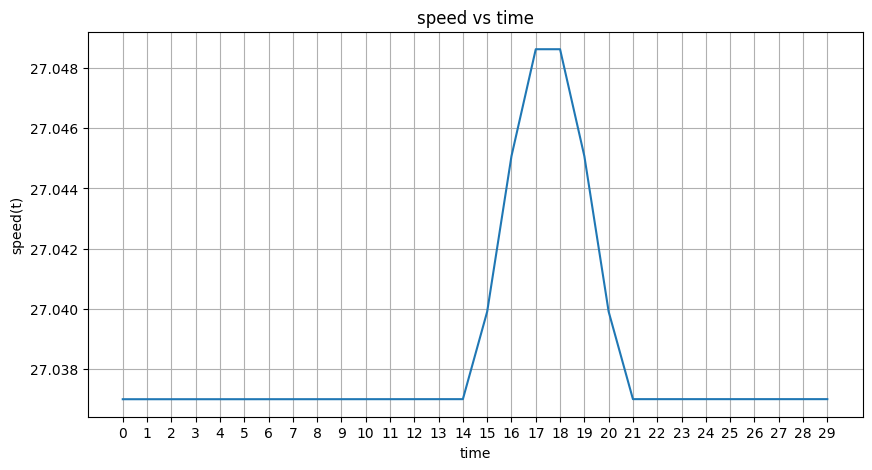

In [7]:
xopt = x.value
yopt = y.value
time = np.arange(length)
# plotting y vs time
plt.figure(figsize=(10,5),dpi=100,num=1)
plt.plot(time,yopt)
plt.xticks(time,fontsize=10)
plt.grid()
plt.title("Y vs time")
plt.xlabel("time")
plt.ylabel("y(t)")
plt.show()

# plotting x vs time
plt.figure(figsize=(10,5),dpi=100,num=2)
plt.plot(np.arange(length),xopt)
plt.xticks(np.arange(length),fontsize=10)
plt.grid()
plt.title("x vs time")
plt.xlabel("time")
plt.ylabel("x(t)")
plt.show()
# plotting x vs y
plt.figure(figsize=(10,5),dpi=100,num=2)
plt.plot(xopt,yopt)
plt.grid()
plt.title("y vs x")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.show()

#plotting speed
diff_xopt = diff_x.value
diff_yopt = diff_y.value
speed = np.sqrt(diff_xopt*diff_xopt + diff_yopt*diff_yopt)
plt.figure(figsize=(10,5),dpi=100,num=2)
plt.plot(np.arange(length-1),speed)
plt.xticks(np.arange(length-1),fontsize=10)
# plt.yticks(np.arange(20,30),fontsize=10)

plt.grid()
plt.title("speed vs time")
plt.xlabel("time")
plt.ylabel("speed(t)")
plt.show()


In [8]:
xopt[1:] - xopt[:-1]

array([[27.037     ],
       [27.03700005],
       [27.0370001 ],
       [27.03700016],
       [27.03700026],
       [27.03700038],
       [27.03700053],
       [27.03700071],
       [27.0370009 ],
       [27.0370011 ],
       [27.03700131],
       [27.03700153],
       [27.03700174],
       [27.03700196],
       [27.03700218],
       [27.0370023 ],
       [27.0370025 ],
       [27.03700263],
       [27.0370026 ],
       [27.03700259],
       [27.03700253],
       [27.03700251],
       [27.0370025 ],
       [27.03700249],
       [27.03700247],
       [27.03700246],
       [27.03700246],
       [27.03700247],
       [27.0370025 ],
       [27.03700241]])